In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# Notebook to investigate the performance of spike interface in localizing neurons 

In [2]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes

import warnings
from probeinterface.plotting import plot_probe
from matplotlib import cm
from probeinterface import read_prb

import time
import numpy as np

job_kwargs = {'n_jobs' : -1, 'chunk_memory' : '10M', 'verbose': True, 'progress_bar': True}

In [3]:
recording = mr.load_recordings('temporary_files_locationsrecordingsFake_probe.h5')
positions = np.hstack((recording.template_locations[:, 1:3], recording.template_locations[:, 0][:, np.newaxis]))


In [4]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_positions
recording, gt_sorting = si.read_mearec('temporary_files_locationsrecordingsFake_probe.h5')
recording_f = si.bandpass_filter(recording)
recording_f = si.common_reference(recording_f)
recording_f = si.zscore(recording_f)

/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC in

In [5]:
benchmarks = []
waveforms = None
for method in ['center_of_mass', 'monopolar_triangulation']:
    if method == 'center_of_mass':
        for feature in ['ptp', 'energy', 'v_peak']:
            title = f'CoM ({feature})'
            params = {'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'monopolar_triangulation':
        title = f'Monopolar'
        params = {'enforce_decrease': True}
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks.append(bench)
    

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

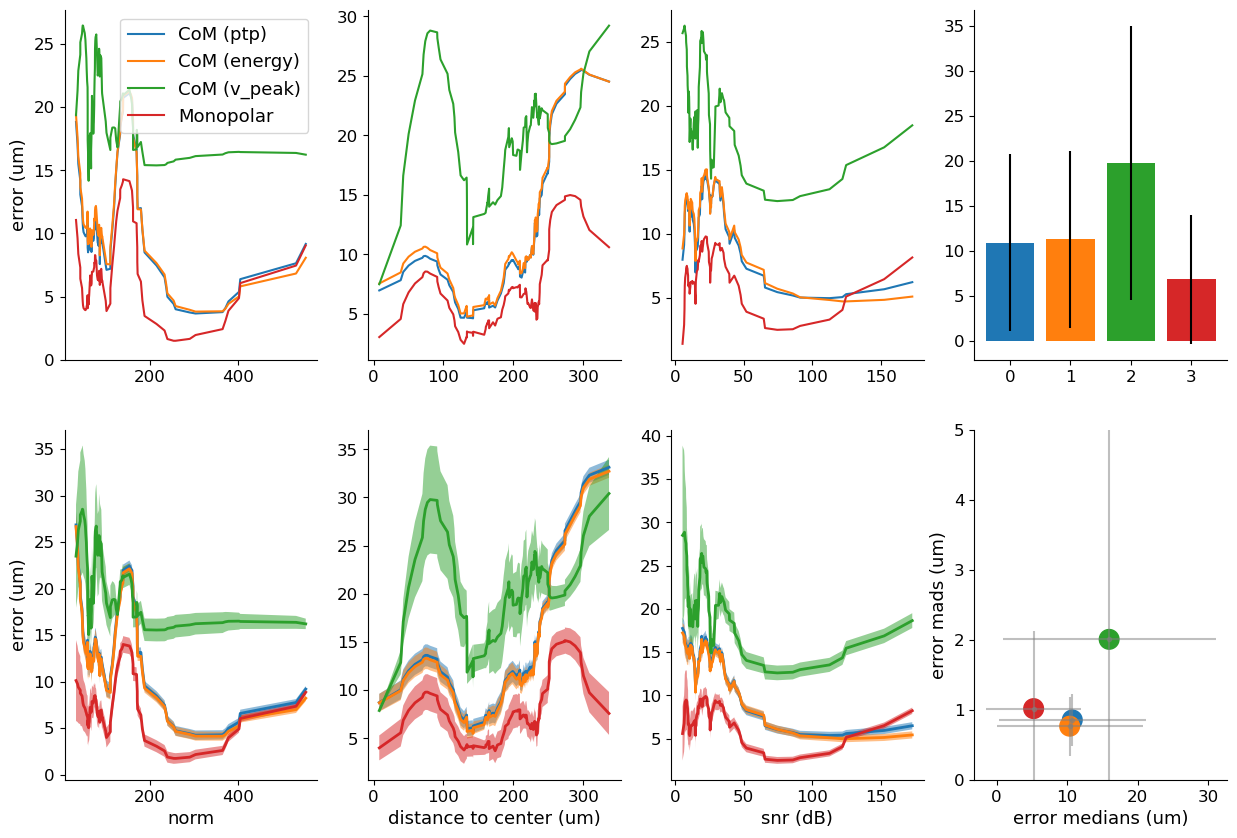

In [160]:
plot_comparison_positions(benchmarks)
import pylab as plt
plt.savefig('comparison.pdf')

In [14]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_figure_1

A Jupyter Widget

A Jupyter Widget

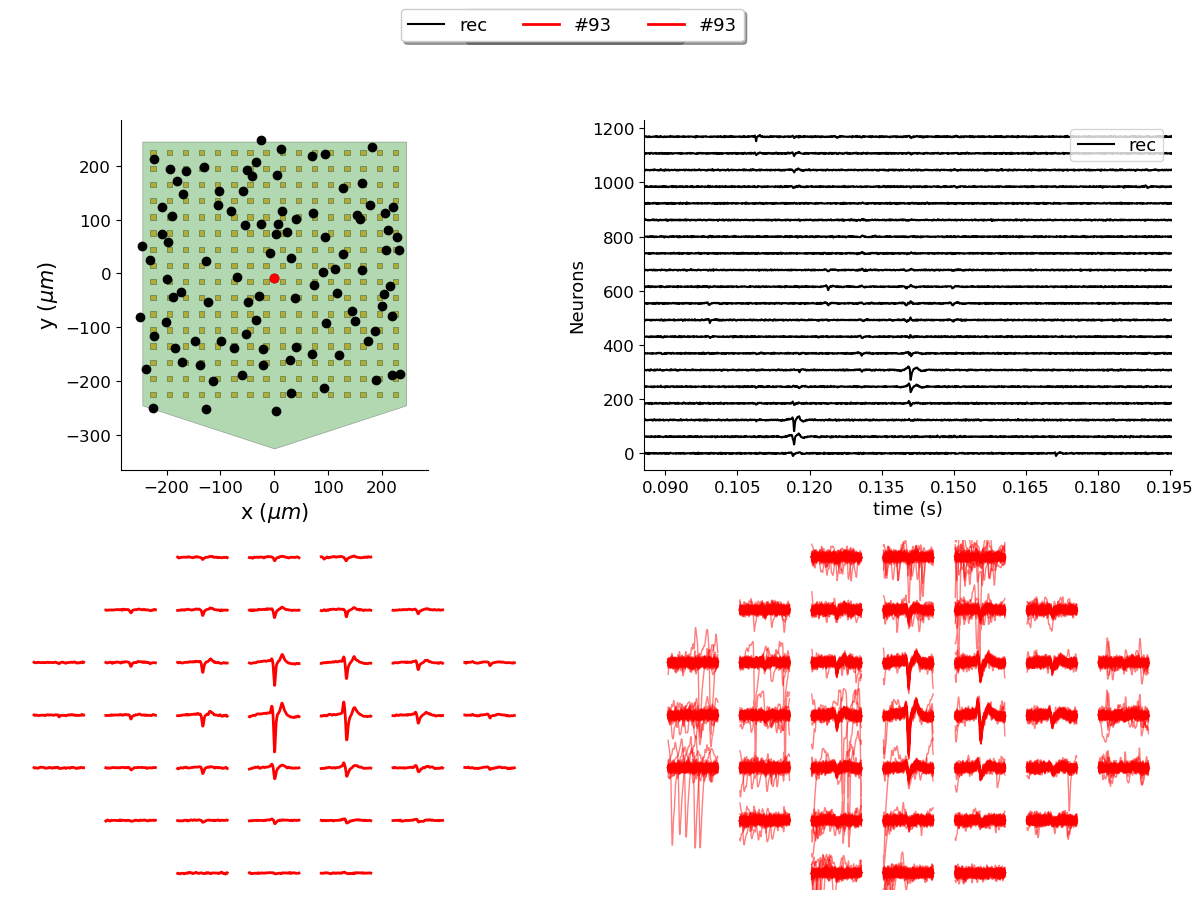

In [141]:
plot_figure_1(benchmarks[0])
import pylab as plt
plt.savefig('illustration.pdf')

In [162]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_inferences

/tmp/ipykernel_150252/1045525437.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


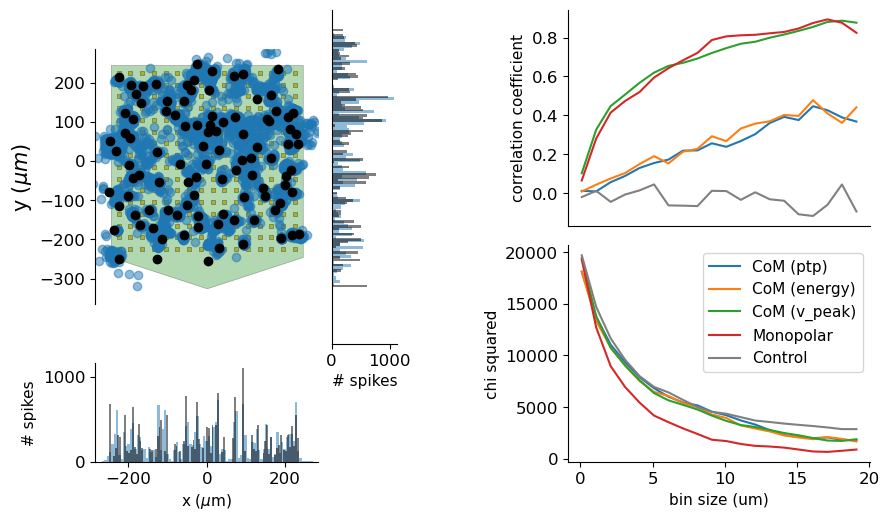

In [164]:
plot_comparison_inferences(benchmarks)
plt.tight_layout()
plt.savefig('impact.pdf')

In [7]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import plot_comparison_precision

In [8]:
benchmarks_ms = {}
for method in ['monopolar_triangulation', 'center_of_mass']:
    benchmarks_ms[method] = {}
    for t_range in [0.25, 0.5, 0.75, 1, 1.25, 1.5]:
        if method == 'monopolar_triangulation':
            title = f'Mononopolar [{t_range}ms]'
            params = {'enforce_decrease': True, 'ms_before' : t_range, 'ms_after' : t_range}
        else:
            params = {'ms_before' : t_range, 'ms_after' : t_range}
            title = f'CoM (ptp) [{t_range}ms]'
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms    
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks_ms[method][t_range] = bench
    

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

In [9]:
benchmarks_radius = {}
waveforms = None
for method in ['monopolar_triangulation', 'center_of_mass']:
    benchmarks_radius[method] = {}
    for r_range in [30, 50, 75, 100, 125, 150]:
        if method == 'monopolar_triangulation':
            title = f'Mononopolar [{r_range}um]'
            params = {'enforce_decrease': True, 'local_radius_um' : r_range}
        else:
            params = {'local_radius_um' : r_range}
            title = f'CoM (ptp) [{r_range}um]'
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms    
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks_radius[method][r_range] = bench
    

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

In [10]:
recordings = {}
for cut_off in [100, 500, 900]:
    recordings[cut_off] = si.bandpass_filter(recording, freq_min=cut_off)
    recordings[cut_off] = si.common_reference(recordings[cut_off])
    recordings[cut_off] = si.zscore(recordings[cut_off])

In [12]:
benchmarks_cutoff = {}
for method in ['center_of_mass']:
    benchmarks_cutoff[method] = {}
    for cut_off in [100, 500, 900]:
        if method == 'monopolar_triangulation':
            title = f'Mononopolar [{cut_off}Hz]'
            params = {'enforce_decrease': True}
        else:
            title = f'CoM (ptp) [{cut_off}Hz]'
            params = {}

        bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        bench.run(method, params)
        benchmarks_cutoff[method][cut_off] = bench

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/99 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/99 [00:00<?, ?it/s]

In [16]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib


def plot_comparison_precision(benchmarks, cmap='winter'):

    import pylab as plt
    fig, axes = plt.subplots(ncols=2, nrows=len(benchmarks), figsize=(15, 10), squeeze=False)
    
    for icount, benchmark in enumerate(benchmarks):
    
        vrange = np.array(list(benchmark.keys()))
        v_min = np.min(vrange)
        v_max = np.max(vrange)
        
        my_cmap = plt.get_cmap(cmap)
        cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)
        
        for key, bench in benchmark.items():

            spikes = bench.spike_positions[0]
            units = bench.waveforms.sorting.unit_ids
            all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
            all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
            try:
                all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
            except Exception:
                all_z = np.zeros(len(all_x))
                
            gt_positions = bench.gt_positions
            real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
            real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
            try:
                real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
            except Exception:
                real_z = np.zeros(len(real_x))
                
            dx = np.abs(all_x - real_x)
            dy = np.abs(all_y - real_y)
            dz = np.abs(all_z - real_z)
            ax = axes[icount, 0]
            
            colorVal = scalarMap.to_rgba(key)
            
            ax.errorbar(np.arange(3), [dx.mean(), dy.mean(), dz.mean()], 
                        yerr=[dx.std(), dy.std(), dz.std()], label=bench.title, c=colorVal)
        ax.legend()
        ax.set_ylabel('error (um)')
        ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
        _simpleaxis(ax)

        x_means = []
        x_stds = []
        for bench in benchmark.values():
            x_means += [np.mean(bench.medians_over_templates)]
            x_stds += [np.std(bench.medians_over_templates)]

        #ax.set_yticks([])
        #ax.set_ylim(ymin, ymax)

        ax = axes[icount, 1]
        _simpleaxis(ax)

        y_means = []
        y_stds = []
        colors = []
        for key, bench in benchmark.items():
            y_means += [np.mean(bench.mads_over_templates)]
            y_stds += [np.std(bench.mads_over_templates)]
            colors += [scalarMap.to_rgba(key)]

        ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
        ax.scatter(x_means, y_means, c=colors, s=200)

        ax.set_ylabel('error variances (um)')
        ax.set_xlabel('error means (um)')
      #ax.set_yticks([]
        ymin, ymax = ax.get_ylim()
        #ax.set_ylim(0, 25)
        ax.legend()

In [150]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib

def plot_comparison_precision_2(benchmarks, cmaps = ['Reds', 'Blues'], mycolors=['C3', 'C0']):

    import pylab as plt
    fig, axes = plt.subplots(nrows=2, ncols=len(benchmarks) + 1, figsize=(15, 7), squeeze=False)
    
    for jcount, method in enumerate(benchmarks[0].keys()):
    
        for icount, benchmark in enumerate(benchmarks):

            bench = benchmark[method]
            
            vrange = np.array(list(bench.keys()))
            v_min = np.min(vrange)
            v_max = np.max(vrange)

            my_cmap = plt.get_cmap(cmaps[jcount])
            cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
            scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)

            if icount == len(benchmarks) - 1:
                b = bench[100]

                spikes = b.spike_positions[0]
                units = b.waveforms.sorting.unit_ids
                all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
                all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
                try:
                    all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
                except Exception:
                    all_z = np.nan * np.zeros(len(all_x))

                gt_positions = b.gt_positions
                real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
                real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
                try:
                    real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
                except Exception:
                    real_z = np.nan * np.zeros(len(real_x))

                dx = np.abs(all_x - real_x)
                dy = np.abs(all_y - real_y)
                dz = np.abs(all_z - real_z)
                ax = axes[jcount, icount+1]

                ax.errorbar(np.arange(3), [dx.mean(), dy.mean(), dz.mean()], 
                                yerr=[dx.std(), dy.std(), dz.std()], c=mycolors[jcount])
                _simpleaxis(ax)
                
                ax.set_ylabel('error (um)')
                if jcount == 1:
                    ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
                else:
                    ax.set_xticks([])
            
            ax = axes[jcount, icount]
            
            _simpleaxis(ax)

            y_means = []
            y_stds = []
            colors = []
                
            for key, b in bench.items():
                x_means = [np.mean(b.medians_over_templates)]
                x_stds = [np.std(b.medians_over_templates)]
                y_means = [np.mean(b.mads_over_templates)]
                y_stds = [np.std(b.mads_over_templates)]
                colors = [scalarMap.to_rgba(key)]
                label = b.title.replace('Mononopolar', '')
                label = label.replace('CoM (ptp)', '')
                
                ax.scatter(x_means, y_means, c=colors, label=label, s=200, edgecolor='k')

            #ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
                
    
            ax.legend(loc='lower right')
            
            if icount == 0:
                ax.set_ylabel('error mads (um)')
            else:
                ax.set_yticks([])
            
            if jcount == 0:
                #ax.set_xlim(7, 9)
                pass
            else:
                ax.set_xlabel('error medians (um)')
                #ax.set_xlim(12, 14)
            
            #ymin, ymax = ax.get_ylim()
            
            if jcount == 0:
                ax.set_ylim(0, 2.6)
            else:
                ax.set_ylim(0, 2)
                #ax.set_xlim(5, 20)
            
            #ax.set_title(method)

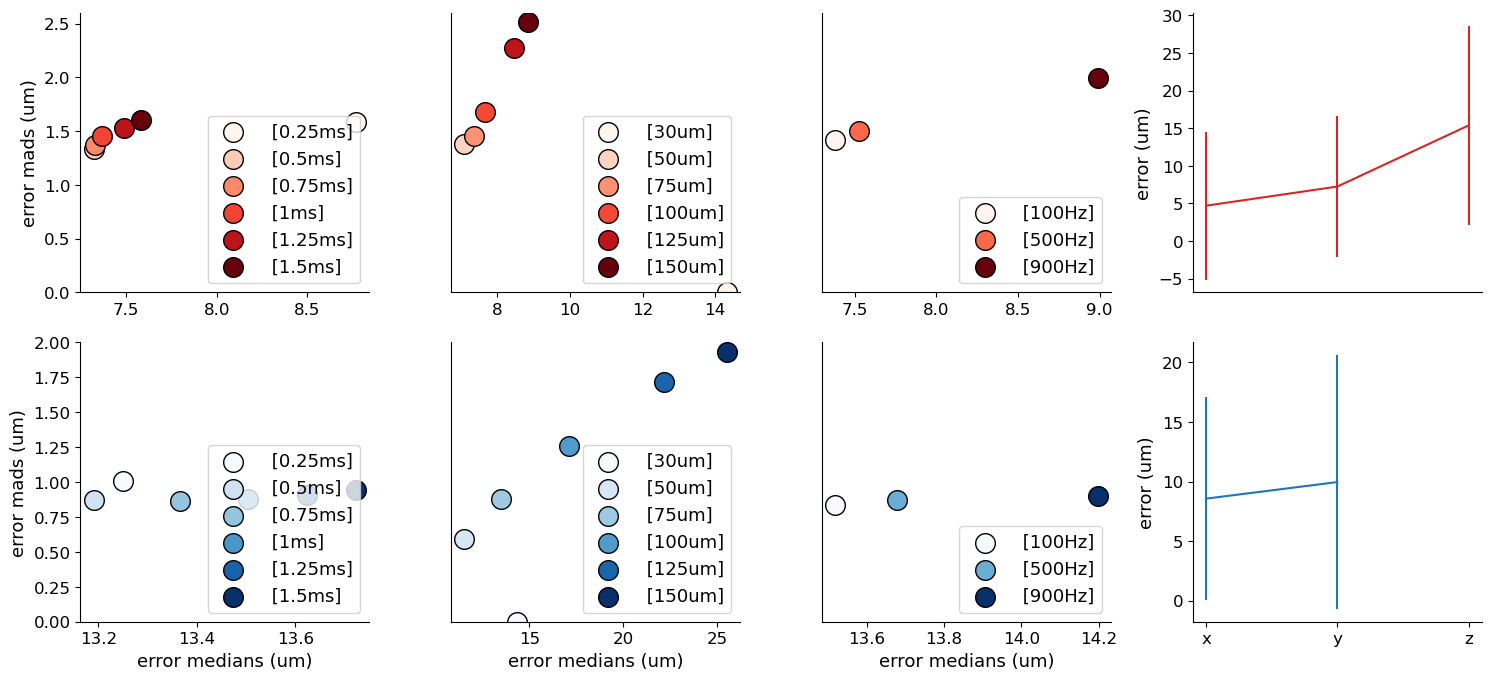

In [151]:
plot_comparison_precision_2([benchmarks_ms, benchmarks_radius, benchmarks_cutoff])
plt.tight_layout()
plt.savefig('influence.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


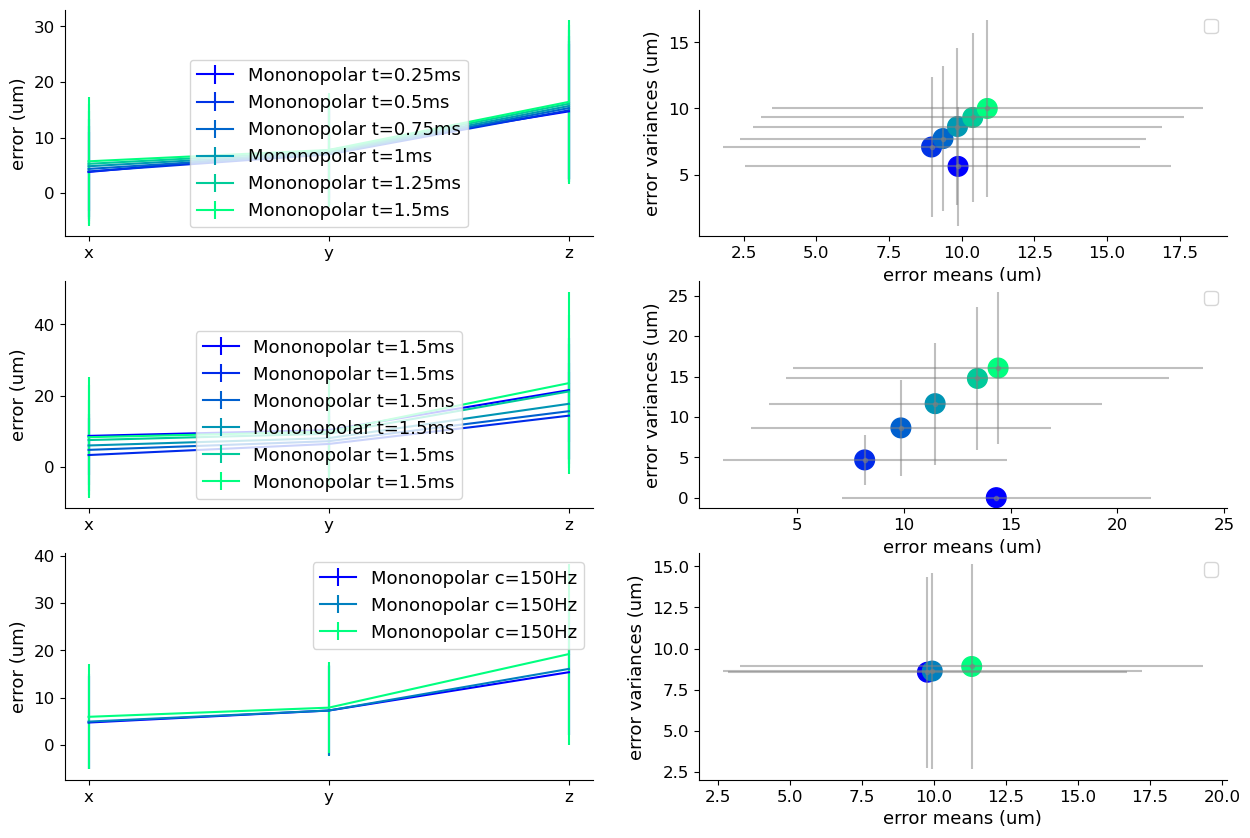

In [29]:
plot_comparison_precision([benchmarks_ms['monopolar_triangulation'], 
                           benchmarks_radius['monopolar_triangulation'],
                          benchmarks_cutoff['monopolar_triangulation']])
plt.savefig('influence.pdf')